In [446]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler

Desafio: Desenvolver o modelo preditivo do valor target disponível na base de dados
Clientes.csv. Vocês irão dividir a base train.csv em duas amostras: uma para treino e
outra para validação.
A partir do modelo escolhido vocês irão prever quais clientes tem propensão a ficar
inadimplente na base test.

In [447]:
data = pd.read_csv("./clientes.csv", sep=",")
pd.set_option('display.max_columns', None)
data.head(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [449]:
data.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [450]:
# Removendo variaveis
data.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)
data.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [451]:
# Removendo valores nullos da variavel target
data = data[data['target_default'].notnull()]

In [452]:
data['reported_income'] = data['reported_income'].replace(np.inf, np.nan)
data.loc[data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [453]:
data['last_amount_borrowed'].fillna(value=0, inplace=True)
data['last_borrowed_in_months'].fillna(value=0, inplace=True)
data['n_issues'].fillna(value=0, inplace=True)

In [454]:
# Preenchendo null em variaveis numericas
df_credit_num = data.select_dtypes(exclude='object').columns
for c in df_credit_num:
  data[c].fillna(value=data[c].median(), inplace=True)

0        350.0
1        370.0
2        360.0
3        510.0
4        500.0
         ...  
44995    280.0
44996    370.0
44997    280.0
44998    240.0
44999    530.0
Name: score_3, Length: 41741, dtype: float64
0        101.800832
1         97.062615
2        100.027073
3        101.599485
4         98.474289
            ...    
44995     96.379531
44996     96.124977
44997    102.377780
44998    100.476090
44999    101.095813
Name: score_4, Length: 41741, dtype: float64
0        0.259555
1        0.942655
2        0.351918
3        0.987673
4        0.532539
           ...   
44995    0.416693
44996    0.692196
44997    0.530938
44998    0.214697
44999    0.011369
Name: score_5, Length: 41741, dtype: float64
0        108.427273
1         92.002546
2        112.892453
3         94.902491
4        118.126207
            ...    
44995    103.667082
44996     97.977973
44997     93.687747
44998     86.759074
44999     97.362918
Name: score_6, Length: 41741, dtype: float64
0        0.40
1  

In [455]:
# Preenchendo null em variaveis categoricas
df_credit_cat = data.select_dtypes(include='object').columns
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data.loc[:, df_credit_cat])
data.loc[:, df_credit_cat] = imputer.transform(data.loc[:, df_credit_cat])

In [456]:
bin_var = data.nunique()[data.nunique() == 2].keys().tolist()
num_var = [col for col in data.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in data.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = data.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,target_fraud,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,score_2_+2hzpeP1RWr8PEvL1WTUdw==,score_2_+CxEO4w7jv3QPI/BQbyqAA==,score_2_/tdlnWjXoZ3OjdtBXzdOJQ==,score_2_5/uMrqKj3OL/Xk5OrGx9fg==,score_2_55UK234RR1d7HIWJjmq9tw==,score_2_6J1ZMTzN5GKHXnhM4J1JbA==,score_2_7h+tk4z7O9brtBSe1rNjxA==,score_2_7h8PTkrlTWUPP3yuyP4rUg==,score_2_A+QuW1n/ABeiVVe/9CRZ9Q==,score_2_Fv28Bz0YRTVAT5kl1bAV6g==,score_2_IOVu8au3ISbo6+zmfnYwMg==,score_2_LCak332j+TYFqHC3NDwiqg==,score_2_NLvAOzzmJba/0zolQnWF5Q==,score_2_O4i7FxcROACMVTCgI0WXuA==,score_2_OlDYtdljgSSYM/M1L2CRaQ==,score_2_RO7MTL+j4PH2gNzbhNTq/A==,score_2_SaamrHMo23l/3TwXOWgVzw==,score_2_YLGMUI9hObSh6wD/xfanGg==,score_2_bopP0NxW3+r8tn9xIHTaOw==,score_2_cdpgyOyZS04uXerMNu7uCw==,score_2_d/7Hedyz7ovK9Pn1CYN4+A==,score_2_dCm9hFKfdRm7ej3jW+gyxw==,score_2_dWJRASUFMejk3AHZ1p1Gkg==,score_2_emS9xH8CLoRNie2uSmaDAQ==,score_2_ky19q4V1ZqgL3jnHX0wKDw==,score_2_mX2VRRG38RPiHX+MfjefRw==,score_2_osCzpM4hJrxugqWWuZmMWw==,score_2_pAzpxkhjPsjWldgSX21+zg==,score_2_rJZgTmANW3PjOCQLCcp4iQ==,score_2_tHpS8e9F8d9zg3iOQM9tsA==,score_2_tQUTfUyeuGkhRotd+6WjVg==,score_2_vJyc9xom9v7hwFMPTIpmKw==,score_2_w1miZqhB5+RSamEQJa0rqg==,score_2_wjdj2vxjWoDsEIk0l09ynw==,score_2_wkeCdGeu5sEv4/fjwR0aDg==,state_/+QaZYcpPt5mXLpkv6I8Bw==,state_/78Q+NAqnsdbiE2JReYK9Q==,state_/EoxQEzy1PWWTtv6DNwr2w==,state_/L8vvVesB5WyAv190Hw/rQ==,state_0gQEZgRHqS5KSF3oWQrQfw==,state_0lQuvmygO68ZFXZjzHEOww==,state_1DpYl6dtzY0qE33poow3iw==,state_1tPrGp5Yx4Yev8EWxfJw2w==,state_1vMmtGURgMcjxQbV2KQiUw==,state_1xxlFOWSFxK0/J2VdCKP3g==,state_5hPtRY8gW/3+fPXvGIgWTg==,state_7bX4XFXmYqoMspxup0CrKA==,state_82aTqSzrTImY+SbAOBQzGQ==,state_8ZKN5LHxobLWh6drCDlmhQ==,state_9PWmQ/Uv20r8XvcwDXWUSw==,state_9sS116y/1CqWLVJ8nFOGZg==,state_BB/zpwTH+8GCIVHlhzOU1Q==,state_DLK5rpOxZhCM5oQvfUpkTQ==,state_E8shyM/6btBNXXExsO17zw==,state_GFOaXqGcKJxSSF9aBDDNaA==,state_GW2VZ3dN3OGHSjQ6JkfqQw==,state_Jc0dzuliQSKFl0Xy0bjYCQ==,state_JrdZzPZEa/YIIGwh8OdTKA==,state_KET/Pmr6rHp1RJ/P9ymztw==,state_LXZkF0tV1Ma9JIlIvaUDiw==,state_NX0S6z5x5fEStwXfBQN5FQ==,state_OCoEDgPLpDjHcbEmPpAjvA==,state_P1TKs1aii8osbgO+MszZ2w==,state_QCVqG0wT4xPLQuiTIExO2w==,state_QMl/wADluYmoYZIXDOUktQ==,state_TYC58USu+Tq7c/WS4YLnuQ==,state_VafbDA6D5W2TpGMAUJbW8Q==,state_Ygq6MsM98oC8yceExr69Ig==,state_ZUmHOp1/xBWh5O/uqDutsw==,state_ZVfsutsd1Go0zZEnGp0vEA==,state_bNDXnbe7XAx/VUe+cbjDiw==,state_bwNrC22VlFOFk6/nEHQc6A==,state_cd+7k16vaf6SzwSyvT/fHw==,state_fMOpZ7DFhwQgTxW547UMCQ==,state_fR2lwAMjCb/fNXjsApiOTw==,state_kfFcVGcsJmH2n3eYprLkeQ==,state_orU7WJYGPT/xFwOXY1eBkw==,state_qItmSqWrjm+MopDA+UpKRw==,state_rrVbgRNTRyB6auEycsRrpA==,state_sjJbkqJS7cXalHLBFA+EOQ==,state_umkEte5GXWggFkMOtKQ3Ug==,state_x6Gw/1I8t3KPgT6s82Kodg==,state_xsd3ZdsI3356I3xMxZeiqQ==,state_ygE7OTdsxRMLeXMa0EZwZw==,state_yni6lL4oSly97UVZeRSyxA==,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,shipping_state_BR-AC,shipping_state_BR-AL,shipping_state_BR-AM,shipping_state_BR-AP,shipping_state_BR-BA,shipping_state_BR-CE,shipping_state_BR-DF,shipping_state_BR-ES,shipping_state_BR-GO,shipping_state_BR-MA,shipping_state_BR-MG,shipping_state_BR-MS,shipping_state_BR-MT,shipping_state_BR-PA,shipping_state_BR-PB,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  bool   
 1   score_3                                          41741 non-null  float64
 2   score_4                                          41741 non-null  float64
 3   score_5                                          41741 non-null  float64
 4   score_6                                          41741 non-null  float64
 5   risk_rate                                        41741 non-null  float64
 6   last_amount_borrowed                             41741 non-null  float64
 7   last_borrowed_in_months                          41741 non-null  float64
 8   credit_limit                                     41741 non-null  float64
 9   income                      

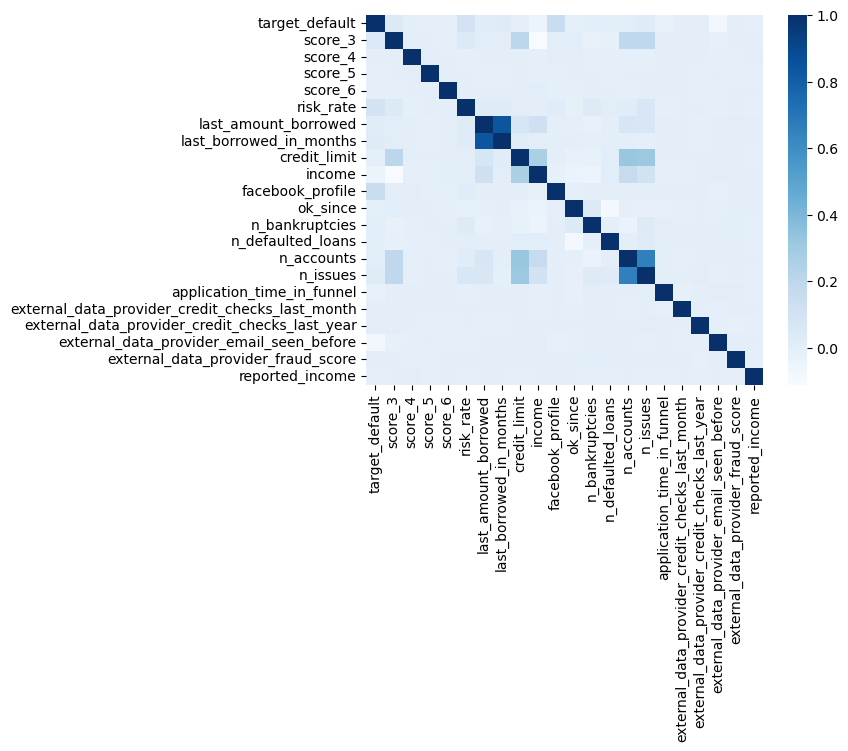

In [457]:
corr = data.corr()
ax = sb.heatmap(
  corr,
  cmap='Blues'
)

In [458]:
bin_var = data.nunique()[data.nunique() == 2].keys().tolist()
num_var = [col for col in data.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in data.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = data.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,target_fraud,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,score_2_+2hzpeP1RWr8PEvL1WTUdw==,score_2_+CxEO4w7jv3QPI/BQbyqAA==,score_2_/tdlnWjXoZ3OjdtBXzdOJQ==,score_2_5/uMrqKj3OL/Xk5OrGx9fg==,score_2_55UK234RR1d7HIWJjmq9tw==,score_2_6J1ZMTzN5GKHXnhM4J1JbA==,score_2_7h+tk4z7O9brtBSe1rNjxA==,score_2_7h8PTkrlTWUPP3yuyP4rUg==,score_2_A+QuW1n/ABeiVVe/9CRZ9Q==,score_2_Fv28Bz0YRTVAT5kl1bAV6g==,score_2_IOVu8au3ISbo6+zmfnYwMg==,score_2_LCak332j+TYFqHC3NDwiqg==,score_2_NLvAOzzmJba/0zolQnWF5Q==,score_2_O4i7FxcROACMVTCgI0WXuA==,score_2_OlDYtdljgSSYM/M1L2CRaQ==,score_2_RO7MTL+j4PH2gNzbhNTq/A==,score_2_SaamrHMo23l/3TwXOWgVzw==,score_2_YLGMUI9hObSh6wD/xfanGg==,score_2_bopP0NxW3+r8tn9xIHTaOw==,score_2_cdpgyOyZS04uXerMNu7uCw==,score_2_d/7Hedyz7ovK9Pn1CYN4+A==,score_2_dCm9hFKfdRm7ej3jW+gyxw==,score_2_dWJRASUFMejk3AHZ1p1Gkg==,score_2_emS9xH8CLoRNie2uSmaDAQ==,score_2_ky19q4V1ZqgL3jnHX0wKDw==,score_2_mX2VRRG38RPiHX+MfjefRw==,score_2_osCzpM4hJrxugqWWuZmMWw==,score_2_pAzpxkhjPsjWldgSX21+zg==,score_2_rJZgTmANW3PjOCQLCcp4iQ==,score_2_tHpS8e9F8d9zg3iOQM9tsA==,score_2_tQUTfUyeuGkhRotd+6WjVg==,score_2_vJyc9xom9v7hwFMPTIpmKw==,score_2_w1miZqhB5+RSamEQJa0rqg==,score_2_wjdj2vxjWoDsEIk0l09ynw==,score_2_wkeCdGeu5sEv4/fjwR0aDg==,state_/+QaZYcpPt5mXLpkv6I8Bw==,state_/78Q+NAqnsdbiE2JReYK9Q==,state_/EoxQEzy1PWWTtv6DNwr2w==,state_/L8vvVesB5WyAv190Hw/rQ==,state_0gQEZgRHqS5KSF3oWQrQfw==,state_0lQuvmygO68ZFXZjzHEOww==,state_1DpYl6dtzY0qE33poow3iw==,state_1tPrGp5Yx4Yev8EWxfJw2w==,state_1vMmtGURgMcjxQbV2KQiUw==,state_1xxlFOWSFxK0/J2VdCKP3g==,state_5hPtRY8gW/3+fPXvGIgWTg==,state_7bX4XFXmYqoMspxup0CrKA==,state_82aTqSzrTImY+SbAOBQzGQ==,state_8ZKN5LHxobLWh6drCDlmhQ==,state_9PWmQ/Uv20r8XvcwDXWUSw==,state_9sS116y/1CqWLVJ8nFOGZg==,state_BB/zpwTH+8GCIVHlhzOU1Q==,state_DLK5rpOxZhCM5oQvfUpkTQ==,state_E8shyM/6btBNXXExsO17zw==,state_GFOaXqGcKJxSSF9aBDDNaA==,state_GW2VZ3dN3OGHSjQ6JkfqQw==,state_Jc0dzuliQSKFl0Xy0bjYCQ==,state_JrdZzPZEa/YIIGwh8OdTKA==,state_KET/Pmr6rHp1RJ/P9ymztw==,state_LXZkF0tV1Ma9JIlIvaUDiw==,state_NX0S6z5x5fEStwXfBQN5FQ==,state_OCoEDgPLpDjHcbEmPpAjvA==,state_P1TKs1aii8osbgO+MszZ2w==,state_QCVqG0wT4xPLQuiTIExO2w==,state_QMl/wADluYmoYZIXDOUktQ==,state_TYC58USu+Tq7c/WS4YLnuQ==,state_VafbDA6D5W2TpGMAUJbW8Q==,state_Ygq6MsM98oC8yceExr69Ig==,state_ZUmHOp1/xBWh5O/uqDutsw==,state_ZVfsutsd1Go0zZEnGp0vEA==,state_bNDXnbe7XAx/VUe+cbjDiw==,state_bwNrC22VlFOFk6/nEHQc6A==,state_cd+7k16vaf6SzwSyvT/fHw==,state_fMOpZ7DFhwQgTxW547UMCQ==,state_fR2lwAMjCb/fNXjsApiOTw==,state_kfFcVGcsJmH2n3eYprLkeQ==,state_orU7WJYGPT/xFwOXY1eBkw==,state_qItmSqWrjm+MopDA+UpKRw==,state_rrVbgRNTRyB6auEycsRrpA==,state_sjJbkqJS7cXalHLBFA+EOQ==,state_umkEte5GXWggFkMOtKQ3Ug==,state_x6Gw/1I8t3KPgT6s82Kodg==,state_xsd3ZdsI3356I3xMxZeiqQ==,state_ygE7OTdsxRMLeXMa0EZwZw==,state_yni6lL4oSly97UVZeRSyxA==,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,shipping_state_BR-AC,shipping_state_BR-AL,shipping_state_BR-AM,shipping_state_BR-AP,shipping_state_BR-BA,shipping_state_BR-CE,shipping_state_BR-DF,shipping_state_BR-ES,shipping_state_BR-GO,shipping_state_BR-MA,shipping_state_BR-MG,shipping_state_BR-MS,shipping_state_BR-MT,shipping_state_BR-PA,shipping_state_BR-PB,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state

In [443]:
df_credit_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  int64  
 1   score_3                                          41741 non-null  float64
 2   score_4                                          41741 non-null  float64
 3   score_5                                          41741 non-null  float64
 4   score_6                                          41741 non-null  float64
 5   risk_rate                                        41741 non-null  float64
 6   last_amount_borrowed                             41741 non-null  float64
 7   last_borrowed_in_months                          41741 non-null  float64
 8   credit_limit                                     41741 non-null  float64
 9   income                      

In [459]:
# Dividindo os dados em treino e teste:
X = df_credit_encoded.drop('target_default', axis=1)
y = df_credit_encoded['target_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [460]:
# standardize numerical variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [461]:
Classif_tree = DecisionTreeClassifier()
classif = Classif_tree.fit(X_train, y_train)

In [462]:
y_pred_all = classif.predict(X_test)

c:\Users\vinix\.conda\envs\p39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [463]:
from sklearn.metrics import confusion_matrix
# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_pred_all)
confusion_matrix

array([[4599, 4172],
       [ 997,  668]], dtype=int64)

In [464]:
print(classification_report(y_test, y_pred_all))

              precision    recall  f1-score   support

           0       0.82      0.52      0.64      8771
           1       0.14      0.40      0.21      1665

    accuracy                           0.50     10436
   macro avg       0.48      0.46      0.42     10436
weighted avg       0.71      0.50      0.57     10436



In [465]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

c:\Users\vinix\.conda\envs\p39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


66.86